In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir=tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar=True)

In [3]:
data_dir

'.\\datasets\\flower_photos'

In [4]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [5]:
image_count=len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [6]:
roses=list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

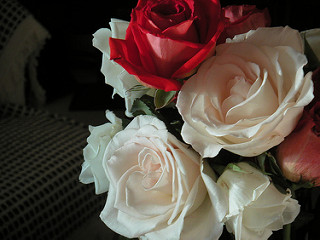

In [7]:
PIL.Image.open(str(roses[1]))

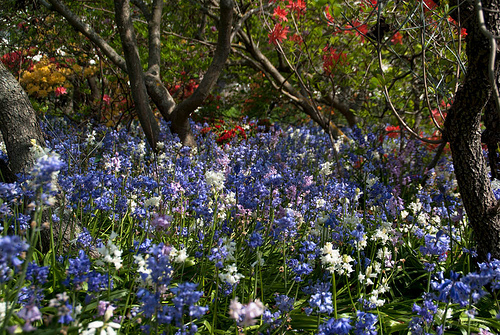

In [8]:
tulips=list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[1]))

In [9]:
flowers_images_dict={
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'roses': list(data_dir.glob('roses/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*'))
}

In [10]:
flowers_labels_dict={
    'daisy':0,
    'dandelion':1,
    'roses':2,
    'sunflowers':3,
    'tulips':4
}

In [11]:
str(flowers_images_dict['daisy'][0])

'datasets\\flower_photos\\daisy\\100080576_f52e8ee070_n.jpg'

In [12]:
img=cv2.imread(str(flowers_images_dict['daisy'][0]))
img.shape

(263, 320, 3)

In [13]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [14]:
X, y=[], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img, (180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [15]:
X=np.array(X)
y=np.array(y)

In [16]:
X.shape

(3670, 180, 180, 3)

In [17]:
y.shape

(3670,)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=0)

In [19]:
X_train_scaled=X_train.astype(np.float32)/255.0
X_test_scaled=X_test.astype(np.float32)/255.0

In [20]:
model=Sequential([
    layers.Conv2D(16, 3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5)
])

model.compile(
    optimizer='adam',
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 12s 36ms/step - loss: 1.3820 - accuracy: 0.4084
Epoch 2/30
86/86 [==============================] - 3s 34ms/step - loss: 1.0573 - accuracy: 0.5898
Epoch 3/30
86/86 [==============================] - 3s 33ms/step - loss: 0.8843 - accuracy: 0.6624
Epoch 4/30
86/86 [==============================] - 3s 33ms/step - loss: 0.6879 - accuracy: 0.7533
Epoch 5/30
86/86 [==============================] - 3s 33ms/step - loss: 0.5112 - accuracy: 0.8147
Epoch 6/30
86/86 [==============================] - 3s 33ms/step - loss: 0.3442 - accuracy: 0.8877
Epoch 7/30
86/86 [==============================] - 3s 33ms/step - loss: 0.1914 - accuracy: 0.9364
Epoch 8/30
86/86 [==============================] - 3s 33ms/step - loss: 0.1314 - accuracy: 0.9589
Epoch 9/30
86/86 [==============================] - 3s 33ms/step - loss: 0.0915 - accuracy: 0.9720
Epoch 10/30
86/86 [==============================] - 3s 35ms/step - loss: 0.0786 - accuracy: 0.9767
Epoch 11

In [21]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 1s 22ms/step - loss: 2.3988 - accuracy: 0.6275


[2.3987977504730225, 0.6274510025978088]

In [22]:
predictions=model.predict(X_test_scaled)
predictions

29/29 [==============================] - 1s 12ms/step


array([[ 9.1402715e-01,  1.0035968e+01, -1.5795267e+00, -3.6685579e+00,
        -5.0703688e+00],
       [ 4.7038231e+00,  7.7440395e+00,  3.8925905e+00, -9.7939138e+00,
        -4.4363871e+00],
       [-1.9705410e+00, -5.6523552e+00,  5.9294653e+00,  2.3854592e+00,
         1.4533249e+00],
       ...,
       [-2.8435135e+00, -6.9007015e+00,  5.1497364e+00,  6.5121355e+00,
        -2.2979598e+00],
       [ 1.2674666e+01,  4.2280240e+00, -6.0316634e-01, -3.0368037e+00,
        -8.7296991e+00],
       [-4.3142223e+00, -5.9974556e+00,  1.2006521e-02,  1.8406649e+00,
         5.9688106e+00]], dtype=float32)

In [23]:
predictions[0]

array([ 0.91402715, 10.035968  , -1.5795267 , -3.668558  , -5.070369  ],
      dtype=float32)

In [24]:
score=tf.nn.softmax(predictions[0])

In [25]:
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([1.0922941e-04, 9.9988043e-01, 9.0240783e-06, 1.1172441e-06,
       2.7501062e-07], dtype=float32)>

In [26]:
np.argmax(score)

1

In [27]:
y_test[0]

1

In [28]:
data_augmentation=keras.Sequential([
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.1),
    keras.layers.RandomFlip("horizontal",
                            input_shape=(180,180,3))
])

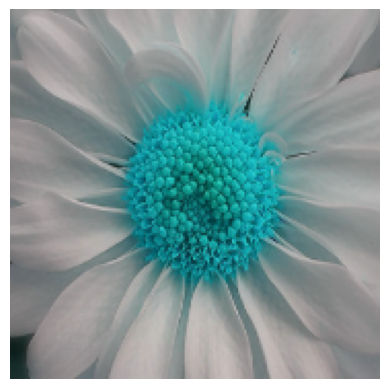

In [29]:
plt.axis("off")
plt.imshow(X[0])

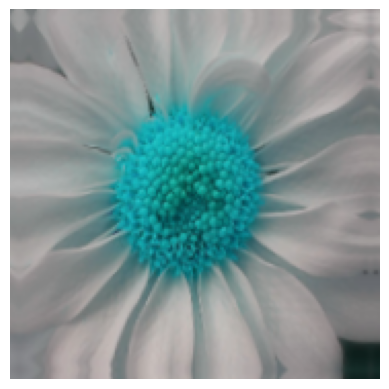

In [30]:
plt.axis('off')
plt.imshow(data_augmentation(X[0]).numpy().astype("uint8"))

In [32]:
with tf.device('/CPU:0'):
    model=Sequential([
        data_augmentation,
        layers.Conv2D(16, 3, padding='same',activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(32, 3, padding='same',activation='relu'),
        layers.MaxPooling2D(),
        layers.Dropout(0.2),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(5)
    ])
    model.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
    model.fit(X_train_scaled, y_train, epochs=40)

Epoch 1/40
86/86 [==============================] - 43s 450ms/step - loss: 1.5954 - accuracy: 0.2852
Epoch 2/40
86/86 [==============================] - 38s 447ms/step - loss: 1.5624 - accuracy: 0.3020
Epoch 3/40
86/86 [==============================] - 38s 438ms/step - loss: 1.5314 - accuracy: 0.3245
Epoch 4/40
86/86 [==============================] - 37s 433ms/step - loss: 1.5114 - accuracy: 0.3394
Epoch 5/40
86/86 [==============================] - 38s 437ms/step - loss: 1.4840 - accuracy: 0.3601
Epoch 6/40
86/86 [==============================] - 37s 434ms/step - loss: 1.4797 - accuracy: 0.3434
Epoch 7/40
86/86 [==============================] - 38s 443ms/step - loss: 1.4568 - accuracy: 0.3855
Epoch 8/40
86/86 [==============================] - 37s 434ms/step - loss: 1.4453 - accuracy: 0.3783
Epoch 9/40
86/86 [==============================] - 37s 431ms/step - loss: 1.4338 - accuracy: 0.3783
Epoch 10/40
86/86 [==============================] - 37s 431ms/step - loss: 1.4111 - accura

In [33]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 1s 17ms/step - loss: 2.4625 - accuracy: 0.3420


[2.462465524673462, 0.34204792976379395]